In [5]:
#IMPORT

import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import mne
import scipy

In [16]:
#EEGLAB (.set, .fdt)
x=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010002_EC.set', preload=True, verbose=True)
print(x.info)

Reading Files/Preprocessed/sub-010002_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, C3, Cz, C4, ...
 chs: 59 EEG
 custom_ref_applied: False
 dig: 59 items (59 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 250.0 Hz
>


In [12]:
chanles_names = x.ch_names
print(len(x.ch_names))

59


In [13]:
datax = x._data

In [14]:
datax.shape

(59, 119345)

In [15]:
type(datax)

numpy.ndarray

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 4.6s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
238 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
238 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


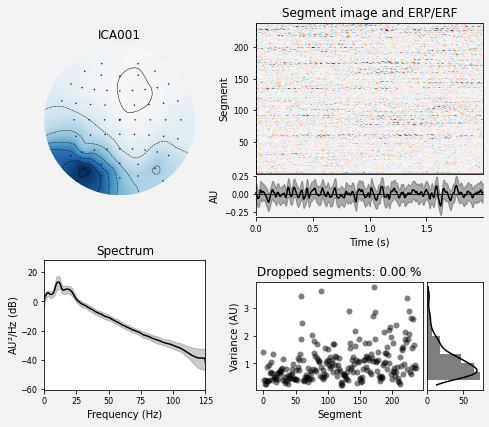

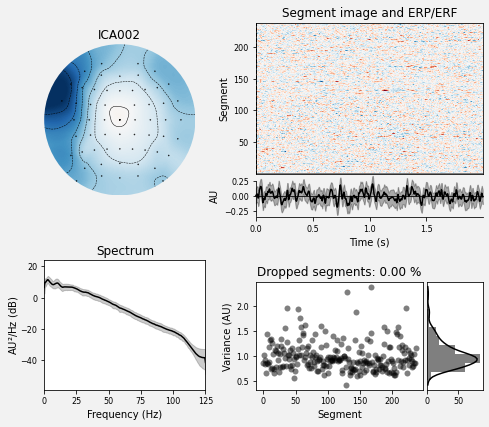

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [18]:

ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(x)

ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(x, picks=ica.exclude)

In [24]:
ica

<ICA | raw data decomposition, fit (fastica): 119345 samples, 20 components, channels used: "eeg", 2 sources marked for exclusion>

In [25]:
ica.compoments


AttributeError: 'ICA' object has no attribute 'compoments'